In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
# type(soup)

# Get the title
title = soup.title
# print(title)

# Print out the text
text = soup.get_text()
# print(soup.text)

all_links = soup.find_all('a')
# for link in all_links:
    # print(link.get("href"))
    
rows = soup.find_all('tr')
# print(rows[:10])

list_rows = []
for row in rows:
    row_td = row.find_all('td')
# print(row_td)
# type(row_td)

    str_cells = str(row_td)
    # cleantext = BeautifulSoup(str_cells, "lxml").get_text()
    # print(cleantext)
    
    regex = re.compile('<.*?>')
    clean = (re.sub(regex, '', str_cells))
    list_rows.append(clean)
# print(clean)
# type(clean)

df = pd.DataFrame(list_rows)
# df.head(10)

df1 = df[0].str.split(',', expand=True)
df1[0] = df1[0].str.strip('[')
df1.head(10)

col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
# print(all_header)

df2 = pd.DataFrame(all_header)
df2.head()

df3 = df2[0].str.split(',', expand=True)
df3.head()

frames = [df3, df1]
df4 = pd.concat(frames)
df4.head(10)

df5 = df4.rename(columns=df4.iloc[0])
df5.head()

# df5.info()
# df5.shape

df6 = df5.dropna(axis=0, how='any')
# df6.info()
# df6.shape

df7 = df6.drop(df6.index[0])
df7.head()

df7.rename(columns={'[Place': 'Place'}, inplace=True)
df7.rename(columns={' Team]': 'Team'}, inplace=True)
df7.rename(columns={' Bib': 'Bib'}, inplace=True)
df7.rename(columns={' Name': 'Name'}, inplace=True)
df7.rename(columns={' Gender': 'Gender'}, inplace=True)
df7.rename(columns={' City': 'City'}, inplace=True)
df7.rename(columns={' Chip Time': 'Chip Time'}, inplace=True)
df7.rename(columns={' Gun Time': 'Gun Time'}, inplace=True)
df7.head()

df7['Team'] = df7['Team'].str.strip(']')
df7.head()

df7['Name'] = df7['Name'].str.strip('\r\n\r\n ')
df7.head()

df7['Team'] = df7['Team'].str.strip('\n\r\n ')
df7.head()

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,36:42,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,39:21,39:24,INTEL TEAM F


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


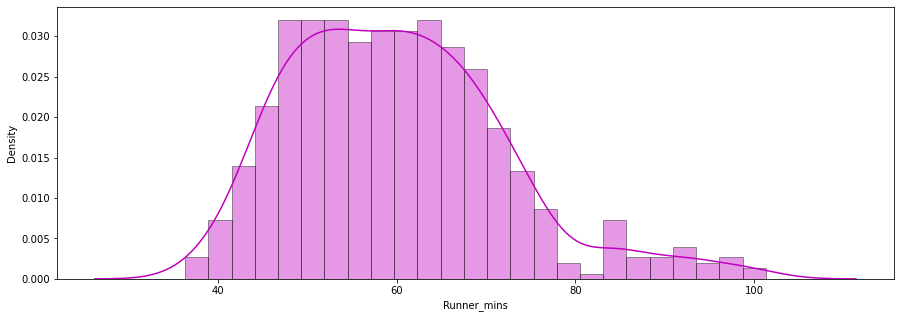

       Runner_mins                                                         \
             count       mean        std        min        25%        50%   
Gender                                                                      
 F           163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M           414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
 F      72.058333  101.300000  
 M      64.804167   98.516667  


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, '')

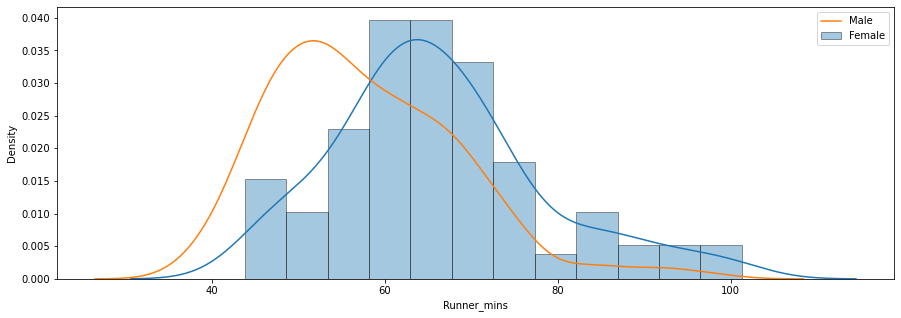

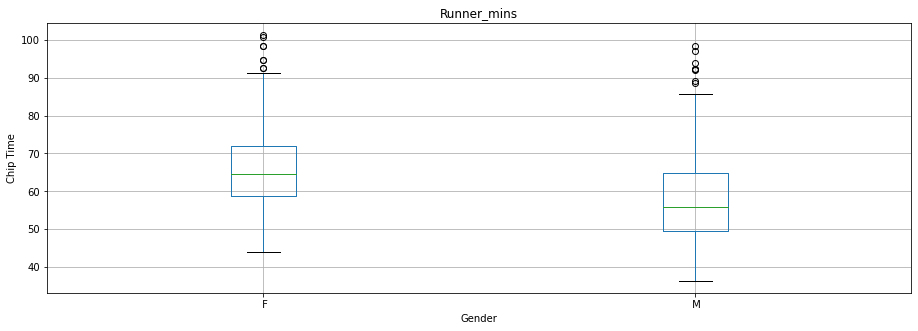

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
title = soup.title
text = soup.get_text()
all_links = soup.find_all('a')
rows = soup.find_all('tr')
list_rows = []
for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td)
    regex = re.compile('<.*?>')
    clean = (re.sub(regex, '', str_cells))
    list_rows.append(clean)
df = pd.DataFrame(list_rows)
df.head(10)

df1 = df[0].str.split(',', expand=True)
df1[0] = df1[0].str.strip('[')
df1.head(10)

col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)

df2 = pd.DataFrame(all_header)
df2.head()

df3 = df2[0].str.split(',', expand=True)
df3.head()

frames = [df3, df1]
df4 = pd.concat(frames)
df4.head(10)

df5 = df4.rename(columns=df4.iloc[0])
df5.head()

df6 = df5.dropna(axis=0, how='any')

df7 = df6.drop(df6.index[0])
df7.head()

df7.rename(columns={'[Place': 'Place'}, inplace=True)
df7.rename(columns={' Team]': 'Team'}, inplace=True)
df7.rename(columns={' Bib': 'Bib'}, inplace=True)
df7.rename(columns={' Name': 'Name'}, inplace=True)
df7.rename(columns={' Gender': 'Gender'}, inplace=True)
df7.rename(columns={' City': 'City'}, inplace=True)
df7.rename(columns={' Chip Time': 'Chip Time'}, inplace=True)
df7.rename(columns={' Gun Time': 'Gun Time'}, inplace=True)
df7.head()

df7['Team'] = df7['Team'].str.strip(']')
df7.head()

df7['Name'] = df7['Name'].str.strip('\r\n\r\n ')
df7.head()

df7['Team'] = df7['Team'].str.strip('\n\r\n ')
df7.head()

time_list = df7['Chip Time'].tolist()
time_mins = []
for i in time_list:
    if len(i) > 6:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    else:
        m, s = i.split(':')
        math = (int(m) * 60 + int(s))/60
    time_mins.append(math)
# print(time_mins)

df7['Runner_mins'] = time_mins
df7.head()

df7.describe(include=[np.number])

# df7.boxplot(column='Runner_mins')
# plt.grid(True, axis='y')
# plt.ylabel('Chip Time')
# plt.xticks([1], ['Runners'])

x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

f_fuko = df7.loc[df7['Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7['Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

g_stats = df7.groupby("Gender", as_index=True).describe()
print(g_stats)

df7.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Chip Time')
plt.suptitle("")
